# The traditional training of Burmese Rice Price Projection Model using Bidirectional Long Short-term Memory Network   
## Expirement 2 - Test World Bank Dataset   
### The target features are h_rice, l_rice, o_rice, year, month, date, crop_type_encoded

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

2024-10-27 13:55:34.795263: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-27 13:55:34.926141: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-27 13:55:35.052233: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-27 13:55:35.163353: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-27 13:55:35.193579: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-27 13:55:35.393592: I tensorflow/core/platform/cpu_feature_gu

In [2]:
wb = pd.read_csv('me/wb.csv')

In [3]:
wb.dtypes

ISO3                  object
country               object
adm1_name             object
adm2_name             object
mkt_name              object
lat                  float64
lon                  float64
geo_id                object
price_date            object
year                   int64
month                  int64
start_dense_data      object
last_survey_point     object
rice                 float64
o_rice               float64
h_rice               float64
l_rice               float64
c_rice               float64
inflation_rice       float64
trust_rice           float64
dtype: object

In [4]:
wb.shape

(48200, 20)

In [5]:
label_encoder = LabelEncoder()
wb['mkt_name_encoded'] = label_encoder.fit_transform(wb['mkt_name'])
wb['adm1_name_encoded'] = label_encoder.fit_transform(wb['adm1_name'])

In [6]:
print(wb.adm1_name.unique())
print(len(wb.adm1_name.unique()))
print(wb.adm1_name_encoded.unique())
print(len(wb.adm1_name_encoded.unique()))
print(wb.mkt_name.unique())
print(len(wb.mkt_name.unique()))
print(wb.mkt_name_encoded.unique())
print(len(wb.mkt_name_encoded.unique()))

['Yangon' 'Rakhine' 'Shan (North)' 'Kayin' 'Kachin' 'Mon' 'Tanintharyi'
 'Mandalay' 'Shan (South)' 'Shan (East)' 'Kayah' 'Chin' 'Magway' 'Sagaing'
 'Market Average']
15
[14  8 11  3  1  7 13  5 12 10  2  0  4  9  6]
15
['88 ward' 'Ah Nauk Pyin' 'Ah Nauk Ywe' 'Ahpauk Wa' 'Ai Cheng'
 'Alel Than Kyaw' 'AnnMyoThit' 'Aung San' 'Aung Zaya' 'Ba Yint Naung'
 'Ban Wai' 'Barsara' 'Baw Du Pha' 'Bhamo' 'Bhamo Market' 'Bhamo Market-2'
 'Bilin Myo Ma Market' 'Bokpyin' 'BoneSin' 'Butar' 'Buthidaung' 'Chipwi'
 'Chying Thung' 'Dar Paing' 'Dawei' 'Dein Aw' 'Demoso Myoma' 'Du Kahtawng'
 'Falam' 'Galeng' 'Gangaw' 'Garayang' 'Gwa Myoma' 'Hakha Myoma Market'
 'Hlaing Bwe Myo Ma market' 'Hnaring' 'Ho Li' 'Home shop' 'Honai' 'Hopone'
 'Hpakant' 'Hpasaung' 'Hsihseng' 'Htilin' 'Inn Din' 'Insein'
 'Jan Mai Kaung' 'Jaw Masat' 'Ka Mar Ka Sit' 'Ka Nyin Tan' 'KalawMyoma'
 'Kalay' 'Kale' 'Kan Htaunt Camp' 'Kan Mong' 'Kan Nar' 'Kanpetlet'
 'Kanthar' 'Kaung Ming Sang' 'KawKareik Myo Ma Market' 'Kawt Dut'
 'Kha Mauck Si

In [7]:
wb = wb[wb['adm1_name'] == 'Yangon']
wb.head()

,ISO3,country,adm1_name,adm2_name,mkt_name,lat,lon,geo_id,price_date,year,...,last_survey_point,rice,o_rice,h_rice,l_rice,c_rice,inflation_rice,trust_rice,mkt_name_encoded,adm1_name_encoded
0,MMR,Myanmar,Yangon,Yangon (East),88 ward,16.84758,96.27097,gid_168475800962709700,2008-01-01,2008,...,Jun 2024,NaN,506.26,518.56,480.60,505.03,NaN,8.9,0,14
1,MMR,Myanmar,Yangon,Yangon (East),88 ward,16.84758,96.27097,gid_168475800962709700,2008-02-01,2008,...,Jun 2024,NaN,498.36,517.30,479.43,483.79,NaN,8.9,0,14
2,MMR,Myanmar,Yangon,Yangon (East),88 ward,16.84758,96.27097,gid_168475800962709700,2008-03-01,2008,...,Jun 2024,NaN,476.91,494.87,458.95,488.50,NaN,8.9,0,14
3,MMR,Myanmar,Yangon,Yangon (East),88 ward,16.84758,96.27097,gid_168475800962709700,2008-04-01,2008,...,Jun 2024,NaN,484.13,502.07,466.19,496.94,NaN,8.9,0,14
4,MMR,Myanmar,Yangon,Yangon (East),88 ward,16.84758,96.27097,gid_168475800962709700,2008-05-01,2008,...,Jun 2024,NaN,500.49,576.52,482.42,576.52,NaN,8.9,0,14


In [10]:
print(wb.mkt_name.unique())
print(len(wb.mkt_name.unique()))

['88 ward' 'Aung San' 'Aung Zaya' 'Insein' 'Ka Mar Ka Sit' 'Meegwet'
 'Nawarat' 'Ngazalgwae' 'Night Market' 'Padamyar' 'Pin Lone' 'Shwepyitha'
 'Thet Yet Pin Chaung' 'Twantay Myoma' 'YwarMa' 'Zamyinzwel']
16


In [8]:
mkt_name_count = wb['mkt_name_encoded'].value_counts()
print(mkt_name_count)

mkt_name_encoded
0      200
7      200
8      200
45     200
48     200
103    200
145    200
148    200
150    200
157    200
170    200
193    200
214    200
221    200
236    200
237    200
Name: count, dtype: int64


In [30]:
mkt_name_count = wb['adm1_name_encoded'].value_counts()
print(mkt_name_count)

adm1_name_encoded
14    3200
Name: count, dtype: int64


/tmp/ipykernel_19693/1909686918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mkt_name_count.index, y=mkt_name_count.values, palette="Blues_d")  # Create the bar plot


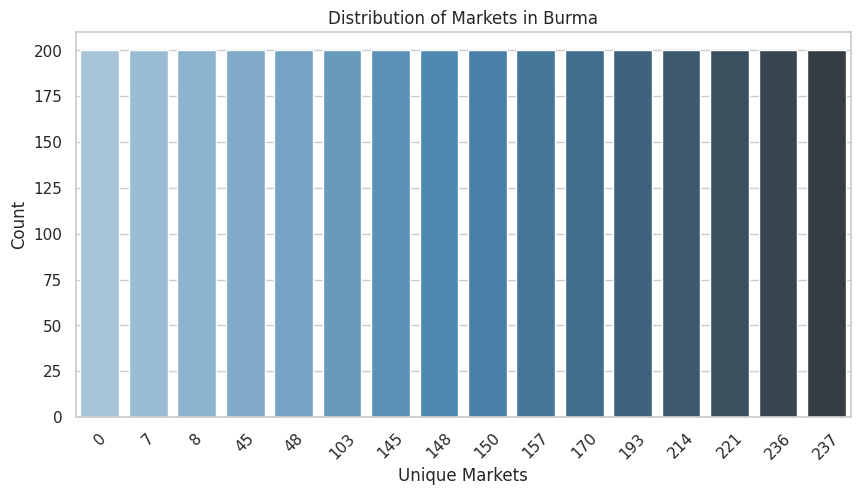

In [34]:
sns.set(style="whitegrid")  # Set a plot style
plt.figure(figsize=(10, 5))  # Set the figure size
sns.barplot(x=mkt_name_count.index, y=mkt_name_count.values, palette="Blues_d")  # Create the bar plot
plt.title("Distribution of Markets in Burma")
plt.xlabel("Unique Markets")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='adm1_name_encoded', ylabel='Count'>

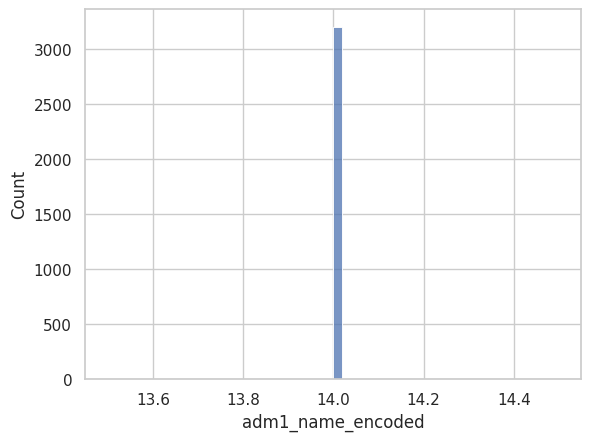

In [43]:
sns.histplot(wb.adm1_name_encoded, bins=50)

<Axes: xlabel='o_rice', ylabel='Count'>

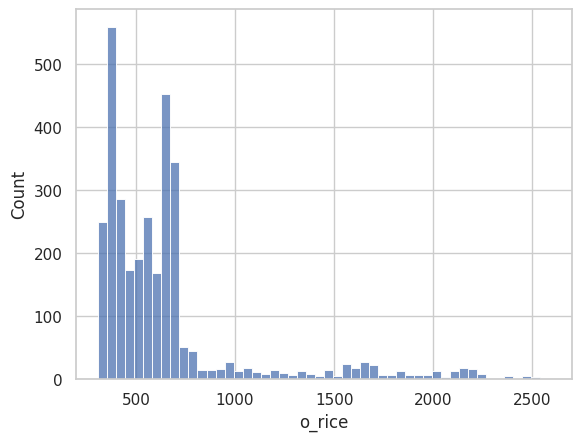

In [44]:
sns.histplot(wb.o_rice[wb.o_rice <= wb.o_rice.max()], bins=50)

<Axes: xlabel='h_rice', ylabel='Count'>

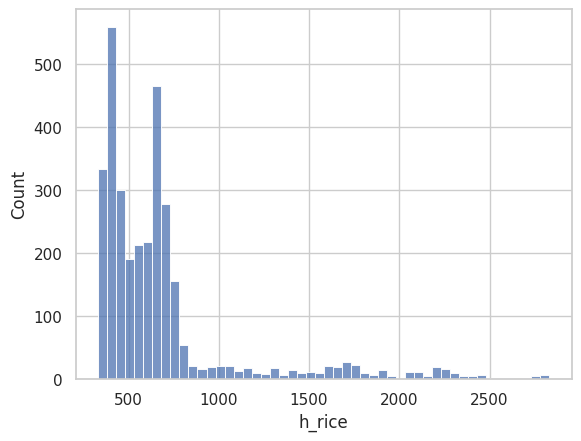

In [45]:
sns.histplot(wb.h_rice[wb.h_rice <= wb.h_rice.max()], bins=50)

<Axes: xlabel='l_rice', ylabel='Count'>

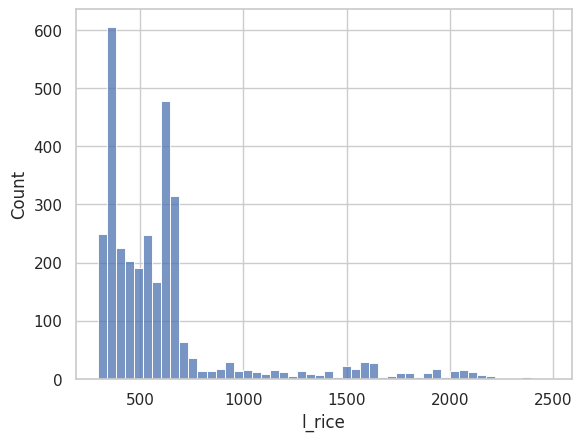

In [46]:
sns.histplot(wb.l_rice[wb.l_rice <= wb.l_rice.max()], bins=50)

<Axes: xlabel='c_rice', ylabel='Count'>

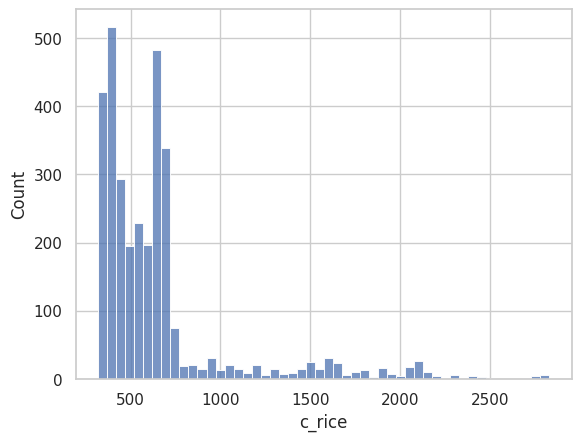

In [47]:
sns.histplot(wb.c_rice[wb.c_rice <= wb.c_rice.max()], bins=50)

<Axes: xlabel='inflation_rice', ylabel='Count'>

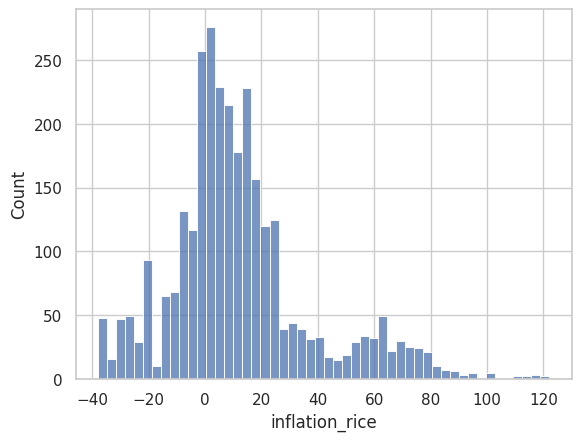

In [48]:
sns.histplot(wb.inflation_rice[wb.inflation_rice <= wb.inflation_rice.max()], bins=50)

<Axes: xlabel='trust_rice', ylabel='Count'>

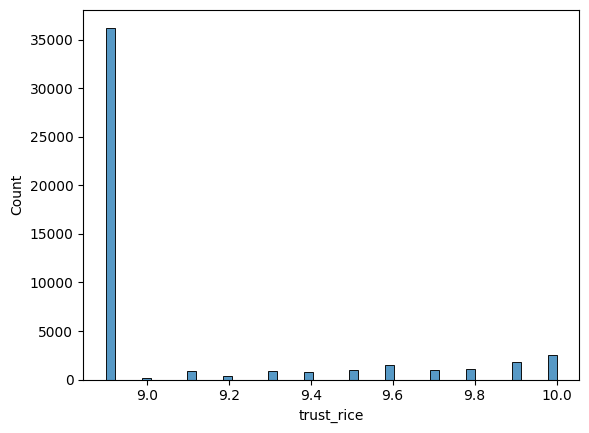

In [27]:
sns.histplot(wb.trust_rice[wb.trust_rice <= wb.trust_rice.max()], bins=50)

<Axes: xlabel='trust_rice', ylabel='Count'>

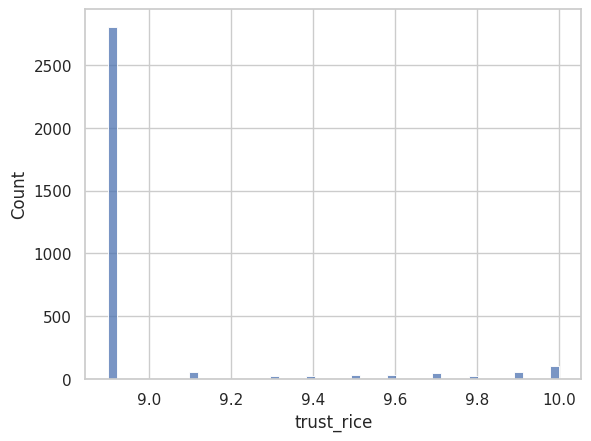

In [49]:
sns.histplot(wb.trust_rice[wb.trust_rice <= wb.trust_rice.max()], bins=50)

In [56]:
# convert the string column to datetime
wb['price_date'] = pd.to_datetime(wb['price_date'])

# extract year, month, day, hour, minute, and second
wb['year'] = wb['price_date'].dt.year
wb['month'] = wb['price_date'].dt.month
wb['day'] = wb['price_date'].dt.day
wb['hour'] = wb['price_date'].dt.hour
wb['minute'] = wb['price_date'].dt.minute
wb['second'] = wb['price_date'].dt.second

In [57]:
wb.dtypes

ISO3                         object
country                      object
adm1_name                    object
adm2_name                    object
mkt_name                     object
lat                         float64
lon                         float64
geo_id                       object
price_date           datetime64[ns]
year                          int32
month                         int32
start_dense_data             object
last_survey_point            object
rice                        float64
o_rice                      float64
h_rice                      float64
l_rice                      float64
c_rice                      float64
inflation_rice              float64
trust_rice                  float64
mkt_name_encoded              int64
adm1_name_encoded             int64
day                           int32
hour                          int32
minute                        int32
second                        int32
dtype: object

In [59]:
for col in wb.columns:
    print(col)
    print(wb[col].unique()[:5])
    print(wb[col].nunique())
    print()

ISO3
['MMR']
1

country
['Myanmar']
1

adm1_name
['Yangon']
1

adm2_name
['Yangon (East)' 'Yangon (North)' 'Yangon (South)' 'Yangon (West)']
4

mkt_name
['88 ward' 'Aung San' 'Aung Zaya' 'Insein' 'Ka Mar Ka Sit']
16

lat
[16.84758 16.92121 16.75551 16.88744 16.75815]
16

lon
[96.27097 96.09731 96.15213 96.10191 96.14304]
16

geo_id
['gid_168475800962709700' 'gid_169212100960973100'
 'gid_167555100961521300' 'gid_168874400961019100'
 'gid_167581500961430400']
16

price_date
<DatetimeArray>
['2008-01-01 00:00:00', '2008-02-01 00:00:00', '2008-03-01 00:00:00',
 '2008-04-01 00:00:00', '2008-05-01 00:00:00']
Length: 5, dtype: datetime64[ns]
200

year
[2008 2009 2010 2011 2012]
17

month
[1 2 3 4 5]
12

start_dense_data
['Jan 2008']
1

last_survey_point
['Jun 2024']
1

rice
[ nan 940. 681. 775. 916.]
117

o_rice
[506.26 498.36 476.91 484.13 500.49]
3095

h_rice
[518.56 517.3  494.87 502.07 576.52]
3037

l_rice
[480.6  479.43 458.95 466.19 482.42]
3032

c_rice
[505.03 483.79 488.5  496.94 576

In [61]:
data = wb[['o_rice', 'h_rice', 'l_rice', 'c_rice', 'inflation_rice', 'mkt_name_encoded','year', 'month', 'day']]

Text(0.5, 1.0, 'Correlation Matrix')

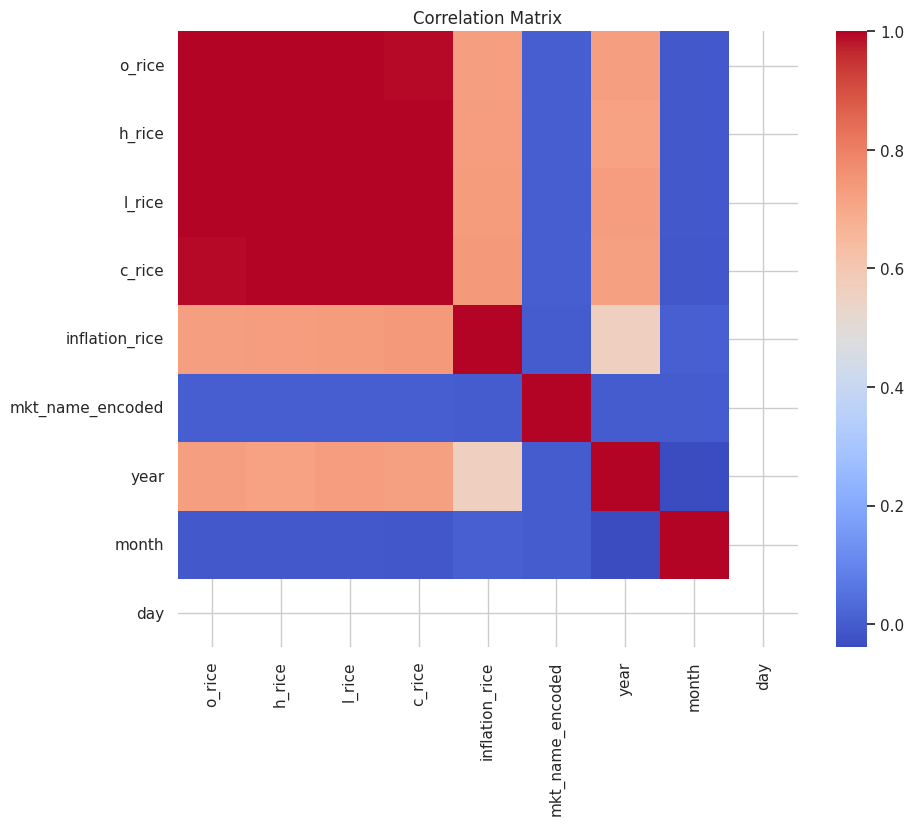

In [62]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')

In [1]:
data.to_csv('me/wb_clean.csv', index=False)

NameError: name 'data' is not defined

In [11]:
data = pd.read_csv('me/wb_clean.csv')  # Replace with the correct dataset file path
gw = data.dropna()

In [12]:
# Define the function
def compute_mutual_information(data, feature_columns, target_columns):
    
    # Step 1: Extract features and target variables
    X = data[feature_columns]  # Feature matrix
    y_o_rice = data[target_columns[0]]  # First target: h_price
    y_h_rice = data[target_columns[1]]  # Second target: l_price
    y_l_rice = data[target_columns[2]]  # First target: h_price
    y_c_rice = data[target_columns[3]]
    
    # Step 2: Compute mutual information for h_price
    mutual_info_o_rice = mutual_info_regression(X, y_o_rice)

    # Step 3: Compute mutual information for l_price
    mutual_info_h_rice = mutual_info_regression(X, y_h_rice)
    mutual_info_l_rice = mutual_info_regression(X, y_l_rice)
    mutual_info_c_rice = mutual_info_regression(X, y_c_rice)

    # Step 4: Create and return DataFrame to display results
    mi_df = pd.DataFrame({
        'Feature': feature_columns,
        'Mutual Information (o_rice)': mutual_info_o_rice,
        'Mutual Information (h_rice)': mutual_info_h_rice,
        'Mutual Information (l_rice)': mutual_info_l_rice,
        'Mutual Information (c_rice)': mutual_info_c_rice,
    })

    # Sort by the highest mutual information for `h_price`
    mi_df = mi_df.sort_values(by='Mutual Information (h_rice)', ascending=False)

    return mi_df

# Example usage
data = gw[['o_rice', 'h_rice', 'l_rice', 'c_rice', 'inflation_rice', 'mkt_name_encoded', 'year', 'month', 'day']]

# Specify feature columns and target columns
feature_columns = ['o_rice', 'h_rice', 'l_rice', 'c_rice', 'inflation_rice', 'mkt_name_encoded', 'year', 'month', 'day']
target_columns = ['o_rice', 'h_rice', 'l_rice', 'c_rice',]

# Call the function to compute mutual information
mi_result = compute_mutual_information(data, feature_columns, target_columns)

# Display the result
mi_result.head

<bound method NDFrame.head of             Feature  Mutual Information (o_rice)  Mutual Information (h_rice)  \
1            h_rice                 4.194285e+00                     6.732650   
0            o_rice                 6.738208e+00                     4.194242   
2            l_rice                 4.178148e+00                     3.533971   
3            c_rice                 3.038800e+00                     3.508101   
4    inflation_rice                 2.679842e+00                     2.790359   
6              year                 1.938570e+00                     1.996064   
7             month                 9.331315e-01                     0.984626   
8               day                 1.221245e-15                     0.000005   
5  mkt_name_encoded                 0.000000e+00                     0.000000   

   Mutual Information (l_rice)  Mutual Information (c_rice)  
1                     3.534238                     3.507895  
0                     4.178894     

In [2]:
#Model Traning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
from keras.callbacks import EarlyStopping
from keras.models import load_model

# Load the dataset
data = pd.read_csv('me/wb_clean.csv')  # Replace with the correct dataset file path
data = data.dropna()

2024-10-13 10:38:23.737460: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-13 10:38:23.741079: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-13 10:38:23.755289: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-13 10:38:23.779559: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-13 10:38:23.786668: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-13 10:38:23.803376: I tensorflow/core/platform/cpu_feature_gu

In [5]:
data.head()

,o_rice,h_rice,l_rice,c_rice,inflation_rice,mkt_name_encoded,year,month,day
12,353.15,368.79,323.66,323.66,-35.91,0,2009,1,1
13,316.89,335.46,302.70,335.46,-30.66,0,2009,2,1
14,326.90,371.79,312.29,371.79,-23.89,0,2009,3,1
15,361.55,378.63,344.48,353.68,-28.83,0,2009,4,1
16,347.01,362.92,331.10,362.69,-37.09,0,2009,5,1


In [3]:
data.shape

(3008, 9)

In [6]:
data.isnull().sum()

o_rice              0
h_rice              0
l_rice              0
c_rice              0
inflation_rice      0
mkt_name_encoded    0
year                0
month               0
day                 0
dtype: int64

Epoch 1/100


/home/lillian/Documents/workme/me/mlzoomcamp/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 26.7446 - val_loss: 0.1843
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2276 - val_loss: 0.1734
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1681 - val_loss: 0.1580
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1469 - val_loss: 0.1450
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1347 - val_loss: 0.1224
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1199 - val_loss: 0.0913
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0860 - val_loss: 0.0676
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0501 - val_loss: 0.0410
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0302 - val_loss: 0.0141
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0117 - val_loss: 0.0044
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036 - val_loss: 0.0021
Epoch 12/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017 - val_

Model saved successfully!
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


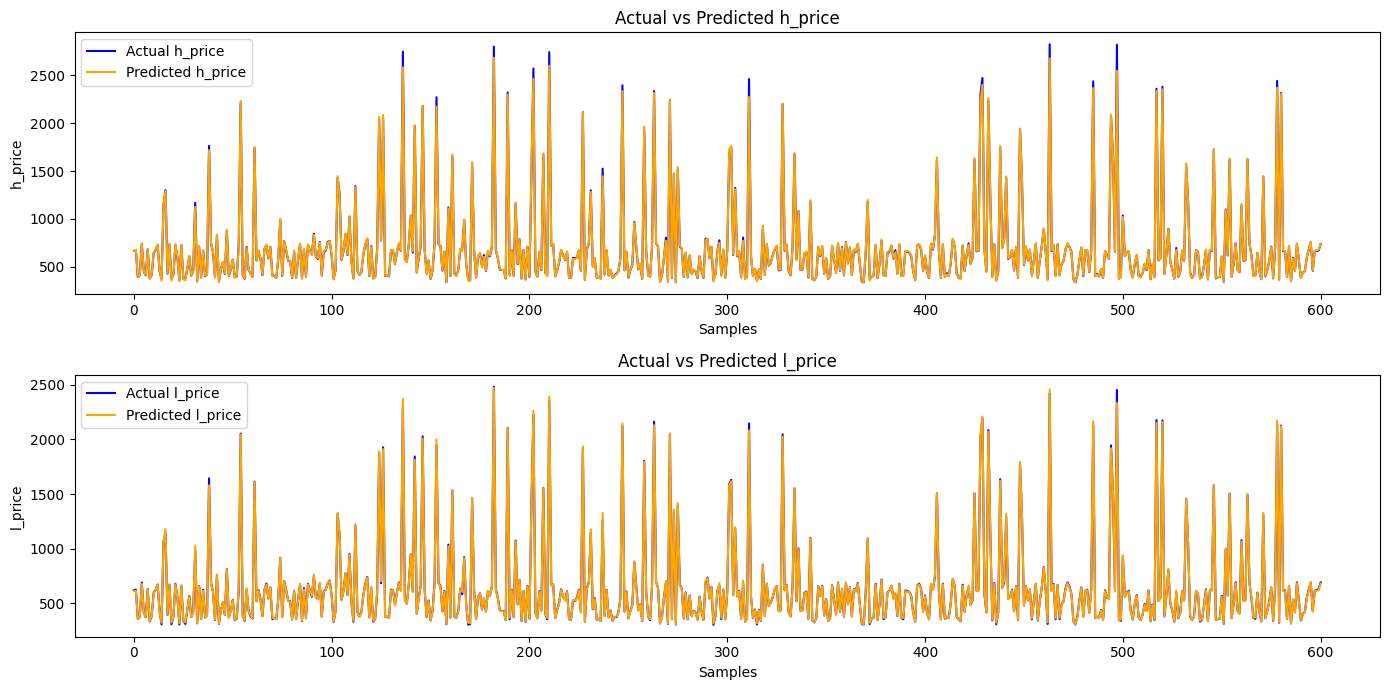

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
from keras.callbacks import EarlyStopping
from keras.models import load_model

# Load the dataset
data = pd.read_csv('me/wb_clean.csv')  # Replace with the correct dataset file path
data = data.dropna()

# Define split parameters
n = len(data)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# Shuffle dataset indices
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

# Apply shuffled indices to split data
s_train = data.iloc[idx[:n_train]]
s_val = data.iloc[idx[n_train:n_train+n_val]]
s_test = data.iloc[idx[n_train+n_val:]]

# Prepare target (y) and features (X)
# Here, y is multi-output: [h_price, l_price]
y_train = np.log1p(s_train[['h_rice', 'l_rice']].values)
y_val = np.log1p(s_val[['h_rice', 'l_rice']].values)
y_test = np.log1p(s_test[['h_rice', 'l_rice']].values)

# Select features: h_price, l_price, year, month for training
X_train = np.log1p(s_train[['h_rice', 'l_rice', 'year', 'month', 'mkt_name_encoded']].values)
X_val = np.log1p(s_val[['h_rice', 'l_rice', 'year', 'month', 'mkt_name_encoded']].values)
X_test = np.log1p(s_test[['h_rice', 'l_rice', 'year', 'month', 'mkt_name_encoded']].values)

# Reshape X to fit LSTM input shape (samples, time_steps, features)
time_steps = 1  # Single time step (since we are doing one-month ahead predictions)
X_train = X_train.reshape(X_train.shape[0], time_steps, X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0], time_steps, X_val.shape[1])
X_test = X_test.reshape(X_test.shape[0], time_steps, X_test.shape[1])

# Build the BiLSTM model for multi-output prediction
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))  # Input shape (time_steps, features)
model.add(Bidirectional(LSTM(50)))
model.add(Dense(25, activation='relu'))
model.add(Dense(2))  # Output layer: Predicting two values (h_price and l_price)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Save the trained model to a file
model.save('wb_year_month_mkt_name_encoded_h_l_price_prediction_model.h5')
print("Model saved successfully!")

# Predict using the test set
predictions = model.predict(X_test)

# Undo the log transformation for actual values and predictions
predictions = np.expm1(predictions)
y_test = np.expm1(y_test)

# Plot actual vs predicted values for h_price
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(y_test[:, 0], label='Actual h_price', color='blue')
plt.plot(predictions[:, 0], label='Predicted h_price', color='orange')
plt.title('Actual vs Predicted h_price')
plt.xlabel('Samples')
plt.ylabel('h_price')
plt.legend()

# Plot actual vs predicted values for l_price
plt.subplot(2, 1, 2)
plt.plot(y_test[:, 1], label='Actual l_price', color='blue')
plt.plot(predictions[:, 1], label='Predicted l_price', color='orange')
plt.title('Actual vs Predicted l_price')
plt.xlabel('Samples')
plt.ylabel('l_price')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100


/tmp/ipykernel_27413/3756222645.py:38: RuntimeWarning: invalid value encountered in log1p
  X_train = np.log1p(s_train[['h_rice', 'l_rice', 'inflation_rice', 'year', 'month']].values)
/tmp/ipykernel_27413/3756222645.py:39: RuntimeWarning: invalid value encountered in log1p
  X_val = np.log1p(s_val[['h_rice', 'l_rice', 'inflation_rice', 'year', 'month']].values)
/tmp/ipykernel_27413/3756222645.py:40: RuntimeWarning: invalid value encountered in log1p
  X_test = np.log1p(s_test[['h_rice', 'l_rice', 'inflation_rice', 'year', 'month']].values)
/home/lillian/Documents/workme/me/mlzoomcamp/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: nan - val_loss: nan
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - val_loss: nan
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - val_loss: nan
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - val_loss: nan
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - val_loss: nan
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - val_loss: nan
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - val_loss: nan
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - val_loss: nan
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - val_loss: nan
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - val_loss: nan


Model saved successfully!
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


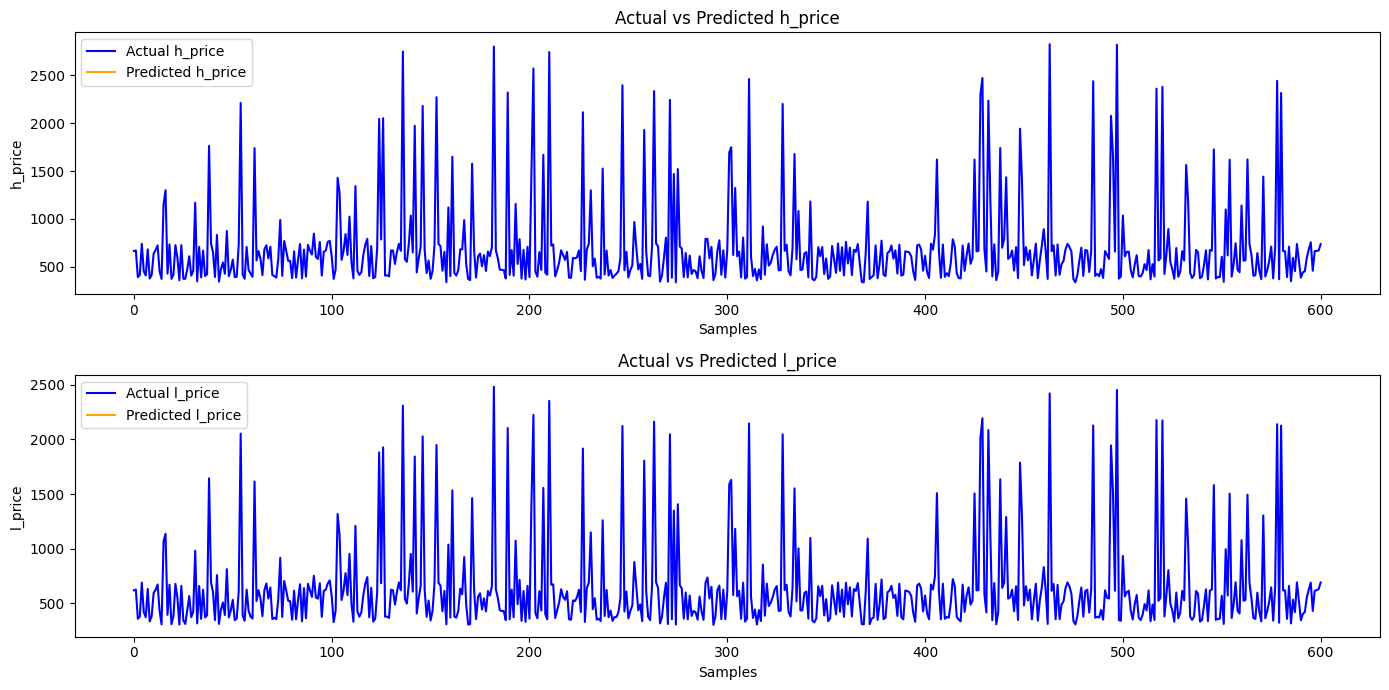

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
from keras.callbacks import EarlyStopping
from keras.models import load_model

# Load the dataset
data = pd.read_csv('me/wb_clean.csv')  # Replace with the correct dataset file path
data = data.dropna()

# Define split parameters
n = len(data)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# Shuffle dataset indices
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

# Apply shuffled indices to split data
s_train = data.iloc[idx[:n_train]]
s_val = data.iloc[idx[n_train:n_train+n_val]]
s_test = data.iloc[idx[n_train+n_val:]]

# Prepare target (y) and features (X)
# Here, y is multi-output: [h_price, l_price]
y_train = np.log1p(s_train[['h_rice', 'c_rice']].values)
y_val = np.log1p(s_val[['h_rice', 'l_rice']].values)
y_test = np.log1p(s_test[['h_rice', 'l_rice']].values)

# Select features: h_price, l_price, year, month for training
X_train = np.log1p(s_train[['h_rice', 'l_rice', 'inflation_rice', 'year', 'month']].values)
X_val = np.log1p(s_val[['h_rice', 'l_rice', 'inflation_rice', 'year', 'month']].values)
X_test = np.log1p(s_test[['h_rice', 'l_rice', 'inflation_rice', 'year', 'month']].values)

# Reshape X to fit LSTM input shape (samples, time_steps, features)
time_steps = 1  # Single time step (since we are doing one-month ahead predictions)
X_train = X_train.reshape(X_train.shape[0], time_steps, X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0], time_steps, X_val.shape[1])
X_test = X_test.reshape(X_test.shape[0], time_steps, X_test.shape[1])

# Build the BiLSTM model for multi-output prediction
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))  # Input shape (time_steps, features)
model.add(Bidirectional(LSTM(50)))
model.add(Dense(25, activation='relu'))
model.add(Dense(2))  # Output layer: Predicting two values (h_price and l_price)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Save the trained model to a file
model.save('wb_year_month_mkt_name_encoded_inflation_rice_h_l_price_prediction_model.h5')
print("Model saved successfully!")

# Predict using the test set
predictions = model.predict(X_test)

# Undo the log transformation for actual values and predictions
predictions = np.expm1(predictions)
y_test = np.expm1(y_test)

# Plot actual vs predicted values for h_price
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(y_test[:, 0], label='Actual h_price', color='blue')
plt.plot(predictions[:, 0], label='Predicted h_price', color='orange')
plt.title('Actual vs Predicted h_price')
plt.xlabel('Samples')
plt.ylabel('h_price')
plt.legend()

# Plot actual vs predicted values for l_price
plt.subplot(2, 1, 2)
plt.plot(y_test[:, 1], label='Actual l_price', color='blue')
plt.plot(predictions[:, 1], label='Predicted l_price', color='orange')
plt.title('Actual vs Predicted l_price')
plt.xlabel('Samples')
plt.ylabel('l_price')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100


/home/lillian/Documents/workme/me/mlzoomcamp/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 32.7982 - val_loss: 0.8430
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3869 - val_loss: 0.1026
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1039 - val_loss: 0.0964
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0967 - val_loss: 0.0902
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0903 - val_loss: 0.0846
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0807 - val_loss: 0.0792
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0741 - val_loss: 0.0686
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0664 - val_loss: 0.0598
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0588 - val_loss: 0.0495
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0471 - val_loss: 0.0400
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0342 - val_loss: 0.0286
Epoch 12/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0278 - val_

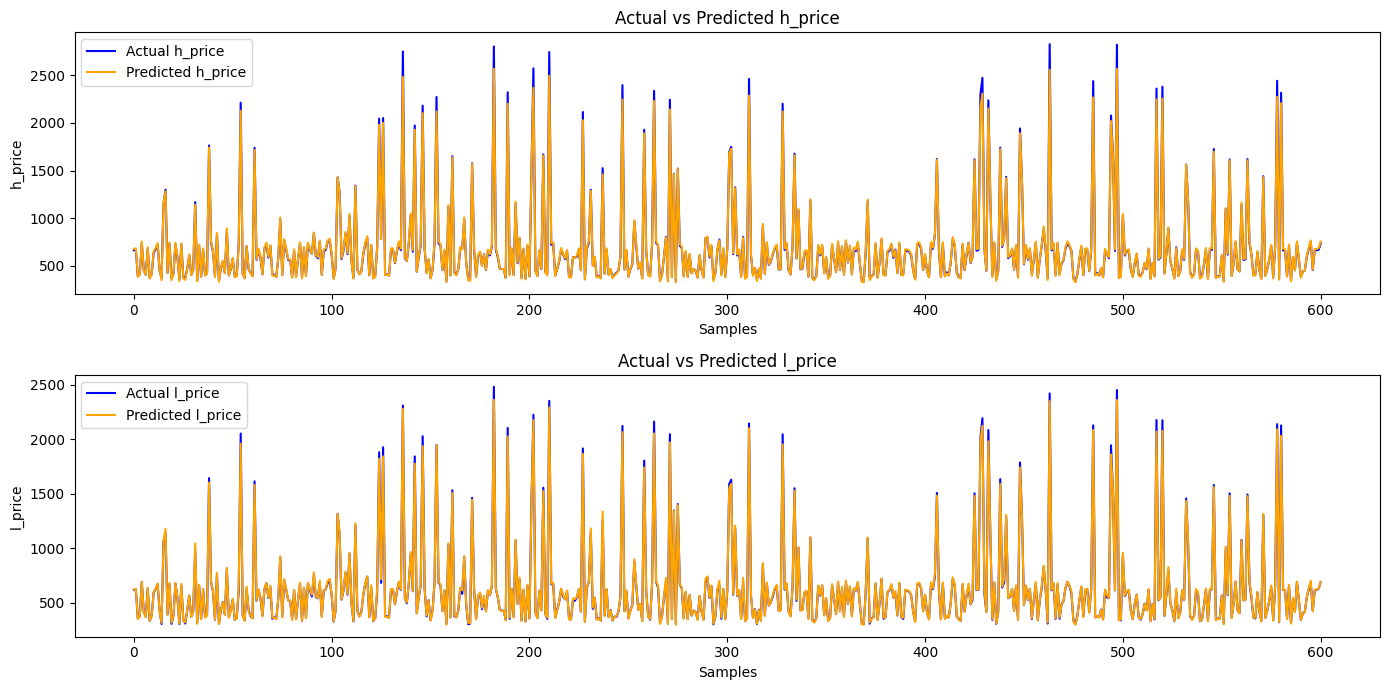

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv('me/wb_clean.csv')  # Replace with the correct dataset file path
data = data.dropna()

# Define split parameters
n = len(data)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# Shuffle dataset indices
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

# Apply shuffled indices to split data
s_train = data.iloc[idx[:n_train]]
s_val = data.iloc[idx[n_train:n_train+n_val]]
s_test = data.iloc[idx[n_train+n_val:]]

# Prepare target (y) and features (X)
# Here, y is multi-output: [h_price, l_price]
y_train = np.log1p(s_train[['h_rice', 'l_rice']].values)
y_val = np.log1p(s_val[['h_rice', 'l_rice']].values)
y_test = np.log1p(s_test[['h_rice', 'l_rice']].values)

# Apply np.log1p to the features 'h_price' and 'l_price'
X_train = np.log1p(s_train[['h_rice', 'l_rice']].values)
X_val = np.log1p(s_val[['h_rice', 'l_rice']].values)
X_test = np.log1p(s_test[['h_rice', 'l_rice']].values)

# Reshape X to fit LSTM input shape (samples, time_steps, features)
time_steps = 1  # Single time step (assuming no time series sequences in data)
X_train = X_train.reshape(X_train.shape[0], time_steps, X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0], time_steps, X_val.shape[1])
X_test = X_test.reshape(X_test.shape[0], time_steps, X_test.shape[1])

# Build the BiLSTM model for multi-output prediction
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))  # Input shape (time_steps, features)
model.add(Bidirectional(LSTM(50)))
model.add(Dense(25, activation='relu'))
model.add(Dense(2))  # Output layer: Predicting two values (h_price and l_price)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Predict using the test set
predictions = model.predict(X_test)

# Undo the log transformation for actual values and predictions
predictions = np.expm1(predictions)
y_test = np.expm1(y_test)

# Function to calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate MAE
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Function to calculate RMSPE
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2)) * 100

# Calculate accuracy metrics for h_price and l_price
metrics = {}
for i, price_type in enumerate(['h_rice', 'l_rice']):
    print(f"\nAccuracy metrics for {price_type}:")
    metrics[price_type] = {}
    
    # Calculate MAPE
    mape_value = mape(y_test[:, i], predictions[:, i])
    print(f"MAPE: {mape_value:.2f}%")
    metrics[price_type]['MAPE'] = mape_value
    
    # Calculate MAE and MAE in percentage
    mae_value = mae(y_test[:, i], predictions[:, i])
    mae_pct = (mae_value / np.mean(y_test[:, i])) * 100
    print(f"MAE: {mae_value:.2f}, MAE (%): {mae_pct:.2f}%")
    metrics[price_type]['MAE'] = mae_value
    metrics[price_type]['MAE (%)'] = mae_pct
    
    # Calculate RMSPE
    rmspe_value = rmspe(y_test[:, i], predictions[:, i])
    print(f"RMSPE: {rmspe_value:.2f}%")
    metrics[price_type]['RMSPE'] = rmspe_value
    
    # Calculate R-squared
    r2_value = r2_score(y_test[:, i], predictions[:, i])
    r2_pct = r2_value * 100
    print(f"R-squared: {r2_value:.2f}, R-squared (%): {r2_pct:.2f}%")
    metrics[price_type]['R-squared'] = r2_value
    metrics[price_type]['R-squared (%)'] = r2_pct

# Plot actual vs predicted values for h_price
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(y_test[:, 0], label='Actual h_price', color='blue')
plt.plot(predictions[:, 0], label='Predicted h_price', color='orange')
plt.title('Actual vs Predicted h_price')
plt.xlabel('Samples')
plt.ylabel('h_price')
plt.legend()

# Plot actual vs predicted values for l_price
plt.subplot(2, 1, 2)
plt.plot(y_test[:, 1], label='Actual l_price', color='blue')
plt.plot(predictions[:, 1], label='Predicted l_price', color='orange')
plt.title('Actual vs Predicted l_price')
plt.xlabel('Samples')
plt.ylabel('l_price')
plt.legend()

plt.tight_layout()
plt.show()


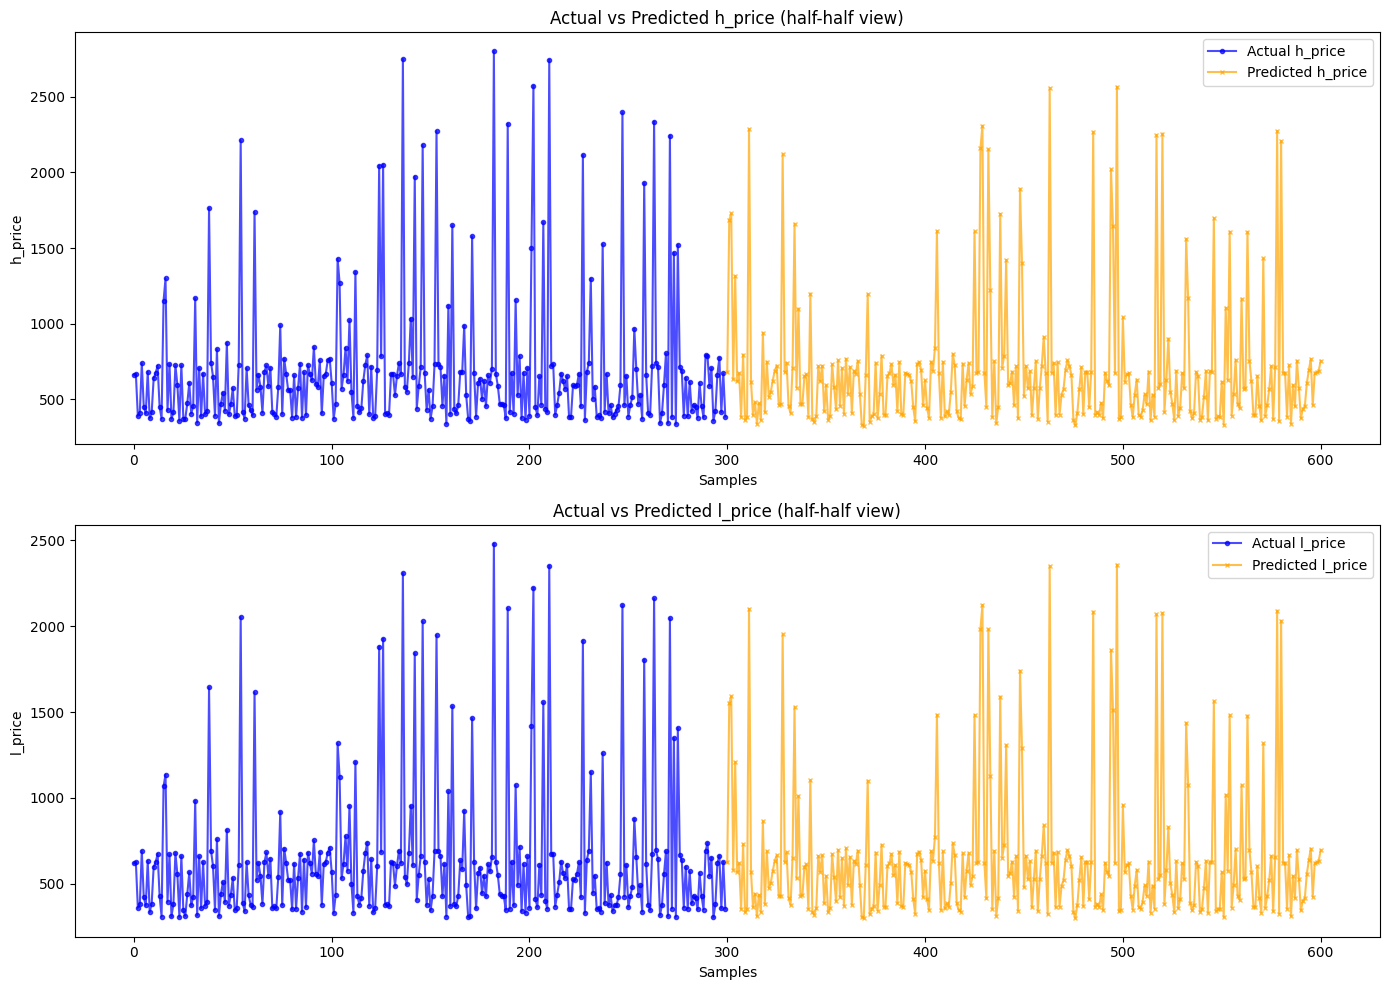

In [12]:
# Define a larger figure size for clarity
plt.figure(figsize=(14, 10))

# Adjust the midpoint to split actual and predicted values
midpoint = len(y_test) // 2

# Plot for h_price
plt.subplot(2, 1, 1)
plt.plot(y_test[:midpoint, 0], label='Actual h_price', color='blue', marker='o', markersize=3, alpha=0.7)
plt.plot(range(midpoint, len(y_test)), predictions[midpoint:, 0], label='Predicted h_price', color='orange', marker='x', markersize=3, alpha=0.7)
plt.title('Actual vs Predicted h_price (half-half view)')
plt.xlabel('Samples')
plt.ylabel('h_price')
plt.legend()

# Plot for l_price
plt.subplot(2, 1, 2)
plt.plot(y_test[:midpoint, 1], label='Actual l_price', color='blue', marker='o', markersize=3, alpha=0.7)
plt.plot(range(midpoint, len(y_test)), predictions[midpoint:, 1], label='Predicted l_price', color='orange', marker='x', markersize=3, alpha=0.7)
plt.title('Actual vs Predicted l_price (half-half view)')
plt.xlabel('Samples')
plt.ylabel('l_price')
plt.legend()

plt.tight_layout()
plt.show()
